In [2]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [3]:
bp_file = '/mnt/volume1/T2D/EMR-data/Glucose.csv'
bp_file_p = '/mnt/volume1/T2D/EMR-data2/Glucose.csv'

In [4]:
data_pd = pd.read_csv(bp_file, sep='|')


In [5]:
data_pd.shape

(35032, 5)

In [6]:
data_pd = data_pd[~(data_pd['Result'].isna())]
data_pd.shape

(35017, 5)

In [7]:
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5699

In [8]:
data_pd.sort_values(["Deidentified_Pat_ID","Result"], inplace=True)
data_pd.head(n=10)


,Deidentified_Pat_ID,Component,Result,Fasting?,ResultYear
28504,MGVNDNAK,GLUCOSE,94.0,NaN,2019
9245,MNAAOKVG,GLUCOSE,99.0,Yes,2017
29152,MNAAOKVG,GLUCOSE,101.0,NaN,2019
32639,MNADDANN,GLUCOSE,102.0,NaN,2019
33,MNADDANN,GLUCOSE,111.0,NaN,2018
34978,MNADDANN,GLUCOSE,122.0,NaN,2017
14472,MNADOVKN,GLUCOSE,87.0,Yes,2018
1712,MNADOVKN,GLUCOSE,120.0,Yes,2016
9250,MNADOVKN,GLUCOSE,134.0,Unknown,2017
3691,MNADOVKN,GLUCOSE,137.0,Unknown,2017


In [9]:
data_pd.shape

(35017, 5)

In [10]:
len(data_pd)
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5699

In [11]:
single_data1 = data_pd.drop_duplicates(["Deidentified_Pat_ID"], keep='last')
single_data1.head(n=10)

,Deidentified_Pat_ID,Component,Result,Fasting?,ResultYear
28504,MGVNDNAK,GLUCOSE,94.0,NaN,2019
29152,MNAAOKVG,GLUCOSE,101.0,NaN,2019
34978,MNADDANN,GLUCOSE,122.0,NaN,2017
3691,MNADOVKN,GLUCOSE,137.0,Unknown,2017
6944,MNADZOHA,GLUCOSE,104.0,Yes,2017
17899,MNAGDKZZ,GLUCOSE,111.0,Yes,2019
7833,MNANKNAN,GLUCOSE,98.0,Yes,2017
4469,MNANZAKG,GLUCOSE,96.0,No,2017
3332,MNAODHZZ,GLUCOSE,131.0,Yes,2016
4996,MNAOGDAK,GLUCOSE,108.0,Unknown,2017


In [12]:
single_data1.shape

(5699, 5)

In [13]:
fasting_dt = single_data1[single_data1['Fasting?']=='Yes']
len(fasting_dt)

2338

In [14]:
single_data1.to_csv(bp_file_p, index=False)

In [15]:
single_data1.max()

Deidentified_Pat_ID    ZZZZZTV
Component              GLUCOSE
Result                     749
ResultYear                2019
dtype: object

In [16]:
single_data1.describe()

,Result,ResultYear
count,5699.000000,5699.000000
mean,121.992999,2016.891911
std,51.260388,1.474447
min,55.000000,2014.000000
25%,98.000000,2016.000000
50%,107.000000,2017.000000
75%,124.000000,2018.000000
max,749.000000,2019.000000


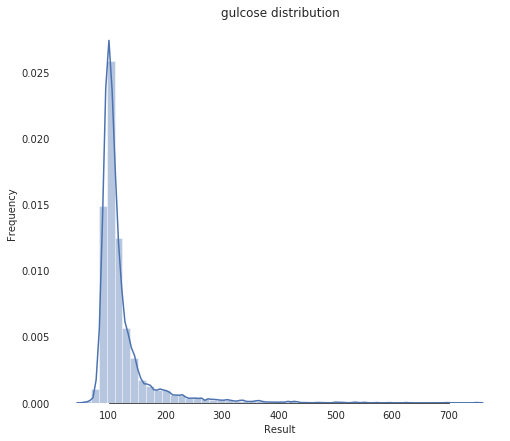

In [17]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(single_data1['Result'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Result")
ax.set(title="gulcose distribution")
sns.despine(trim=True, left=True)
plt.show()

In [18]:
len(single_data1[single_data1["Result"]>300])

107

In [19]:
data_pd_less_200  = data_pd[data_pd['Result']<250]

In [20]:
data_pd_less_200.sort_values(["Deidentified_Pat_ID","Result"], inplace=True)
data_pd_less_200.head(n=10)


,Deidentified_Pat_ID,Component,Result,Fasting?,ResultYear
28504,MGVNDNAK,GLUCOSE,94.0,NaN,2019
9245,MNAAOKVG,GLUCOSE,99.0,Yes,2017
29152,MNAAOKVG,GLUCOSE,101.0,NaN,2019
32639,MNADDANN,GLUCOSE,102.0,NaN,2019
33,MNADDANN,GLUCOSE,111.0,NaN,2018
34978,MNADDANN,GLUCOSE,122.0,NaN,2017
14472,MNADOVKN,GLUCOSE,87.0,Yes,2018
1712,MNADOVKN,GLUCOSE,120.0,Yes,2016
9250,MNADOVKN,GLUCOSE,134.0,Unknown,2017
3691,MNADOVKN,GLUCOSE,137.0,Unknown,2017


In [21]:
data_pd_less_200_1 = data_pd_less_200.drop_duplicates(["Deidentified_Pat_ID"], keep='last')
data_pd_less_200_1.head(n=10)

,Deidentified_Pat_ID,Component,Result,Fasting?,ResultYear
28504,MGVNDNAK,GLUCOSE,94.0,NaN,2019
29152,MNAAOKVG,GLUCOSE,101.0,NaN,2019
34978,MNADDANN,GLUCOSE,122.0,NaN,2017
3691,MNADOVKN,GLUCOSE,137.0,Unknown,2017
6944,MNADZOHA,GLUCOSE,104.0,Yes,2017
17899,MNAGDKZZ,GLUCOSE,111.0,Yes,2019
7833,MNANKNAN,GLUCOSE,98.0,Yes,2017
4469,MNANZAKG,GLUCOSE,96.0,No,2017
3332,MNAODHZZ,GLUCOSE,131.0,Yes,2016
4996,MNAOGDAK,GLUCOSE,108.0,Unknown,2017


In [22]:
data_pd_less_200_1.describe()

,Result,ResultYear
count,5693.000000,5693.000000
mean,117.705270,2016.900755
std,33.343363,1.475314
min,55.000000,2014.000000
25%,98.000000,2016.000000
50%,106.000000,2017.000000
75%,124.000000,2018.000000
max,249.000000,2019.000000


In [23]:
len(data_pd_less_200_1)

5693

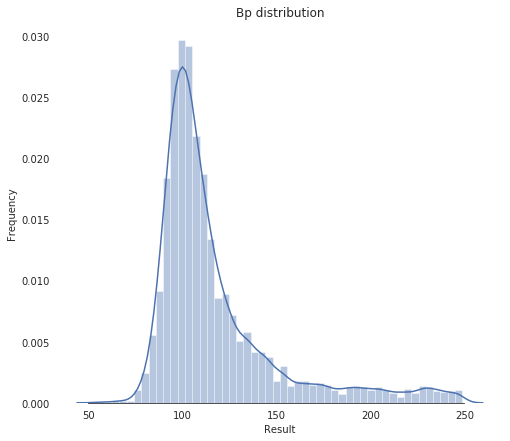

In [24]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd_less_200_1['Result'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Result")
ax.set(title="Bp distribution")
sns.despine(trim=True, left=True)
plt.show()

In [25]:
data_pd_less_200_1.columns = ['Deidentified_Pat_ID','Component','gulcose','Fasting?','ResultYear']

In [26]:
data_pd_less_200_1 = data_pd_less_200_1[['Deidentified_Pat_ID','gulcose','Fasting?']]


In [27]:
pd.Series(data_pd_less_200_1["Fasting?"].tolist()).sort_values().unique()

array(['No', 'Unknown', 'Yes', nan], dtype=object)

In [28]:
len(data_pd_less_200_1[data_pd_less_200_1['Fasting?']=='Yes']), len(data_pd_less_200_1[data_pd_less_200_1['Fasting?']=='No']), len(data_pd_less_200_1[data_pd_less_200_1['Fasting?'].isna()])

(2358, 1202, 1773)

In [29]:
data_pd_less_200_1.loc[((data_pd_less_200_1['Fasting?']!='Yes') & (data_pd_less_200_1['Fasting?']!='No')), 'Fasting?'] = np.nan

In [30]:
len(data_pd_less_200_1[data_pd_less_200_1['Fasting?']=='Yes']), len(data_pd_less_200_1[data_pd_less_200_1['Fasting?']=='No']), len(data_pd_less_200_1[data_pd_less_200_1['Fasting?'].isna()])

(2358, 1202, 2133)

In [31]:
data_pd_less_200_1.to_csv(bp_file_p, index=False)